In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")




import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style = "darkgrid")

In [2]:
data = pd.read_csv("Training Data.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [7]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


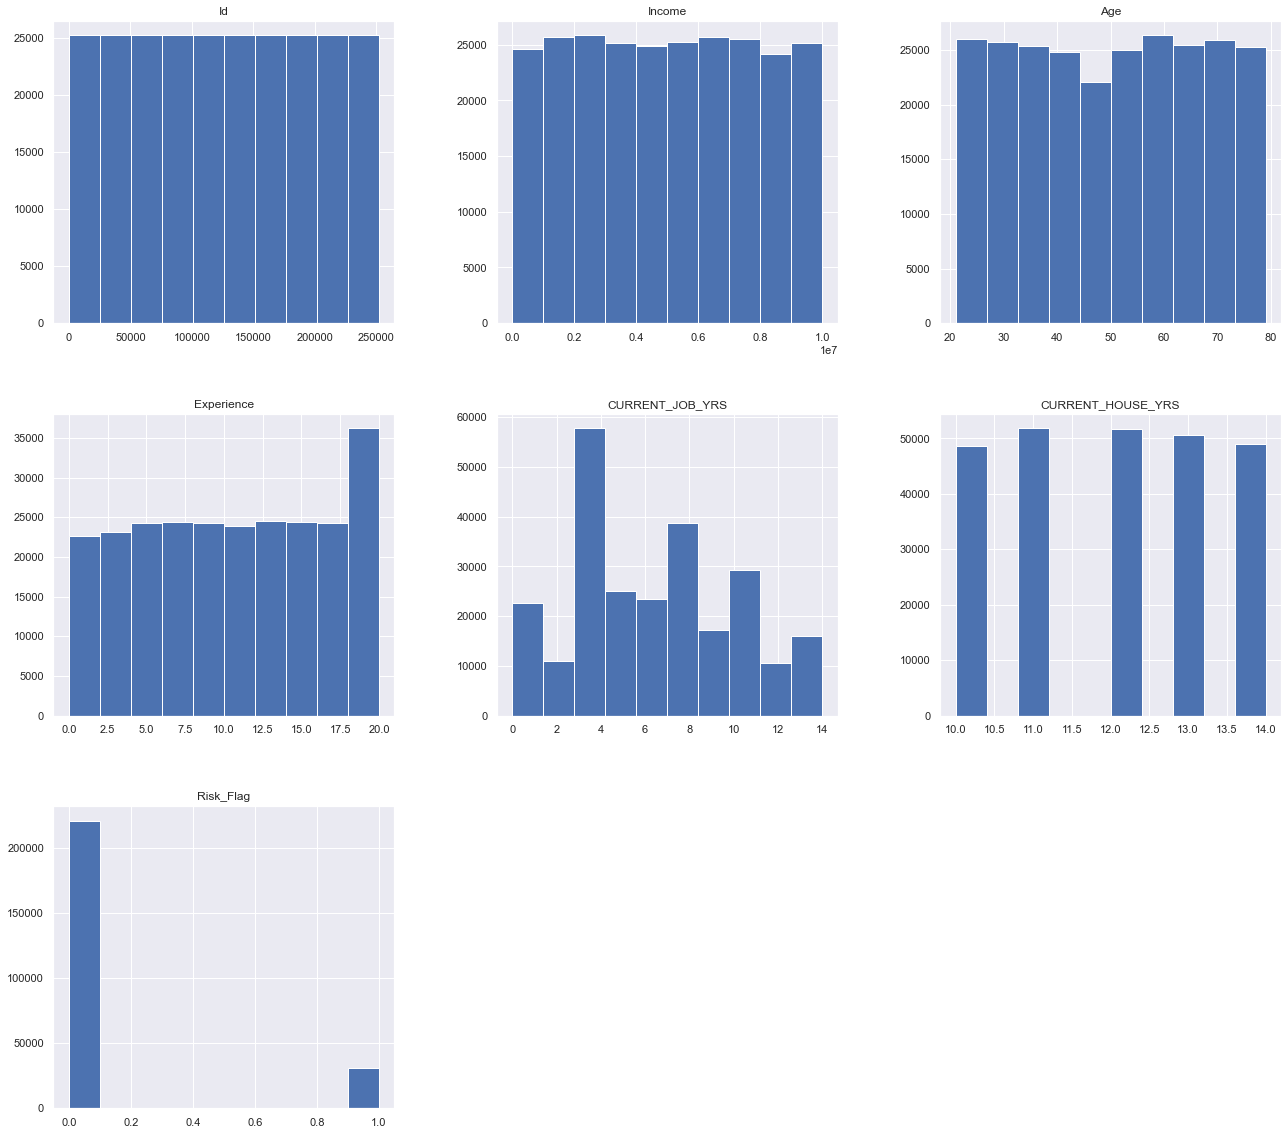

In [8]:
data.hist( figsize = (22, 20) )
plt.show()

In [9]:
data["Risk_Flag"].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

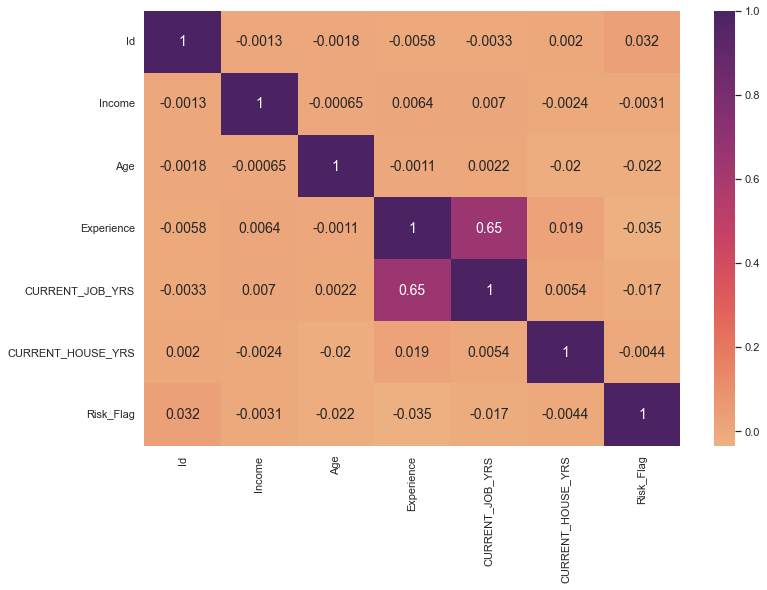

In [10]:
fig, ax = plt.subplots( figsize = (12,8) )

corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})

plt.show()

In [11]:
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

single     226272
married     25728
Name: Married/Single, dtype: int64


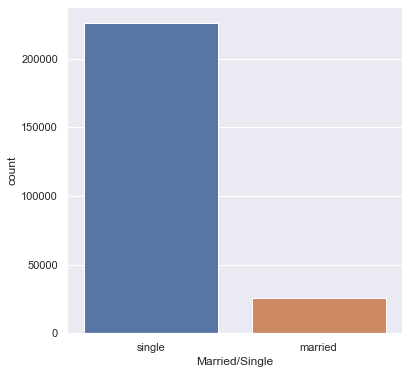

In [12]:
categorical_valcount_hist("Married/Single")

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64


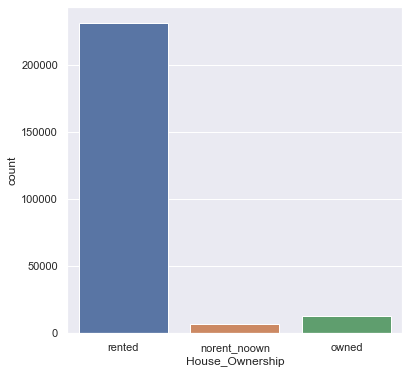

In [13]:
categorical_valcount_hist("House_Ownership")

In [14]:
print( "Total categories in STATE:", len( data["STATE"].unique() ) )
print()
print( data["STATE"].value_counts() )

Total categories in STATE: 29

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64


In [15]:
print( "Total categories in Profession:", len( data["Profession"].unique() ) )
print()
data["Profession"].value_counts()

Total categories in Profession: 51



Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


<AxesSubplot:xlabel='Risk_Flag', ylabel='Income'>

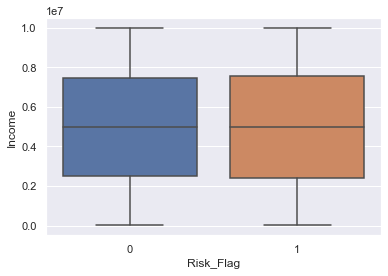

In [17]:
sns.boxplot(x ="Risk_Flag",y="Income" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='Age'>

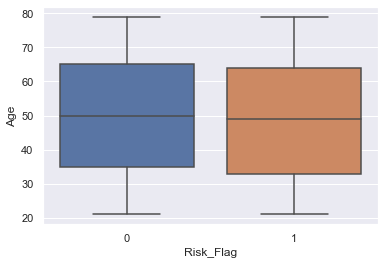

In [18]:
sns.boxplot(x ="Risk_Flag",y="Age" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='Experience'>

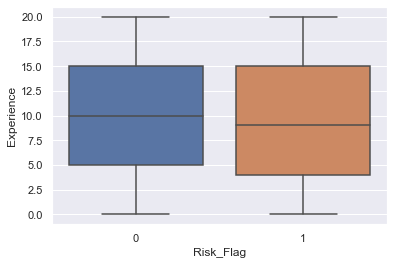

In [19]:
sns.boxplot(x ="Risk_Flag",y="Experience" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

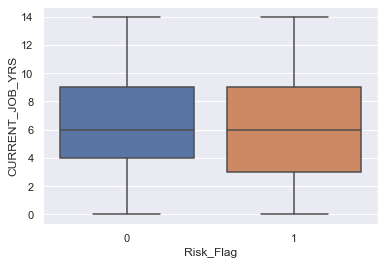

In [20]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = data)

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_HOUSE_YRS'>

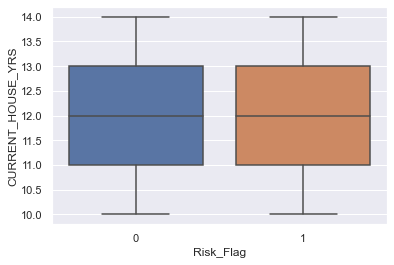

In [21]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_HOUSE_YRS" ,data = data)

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

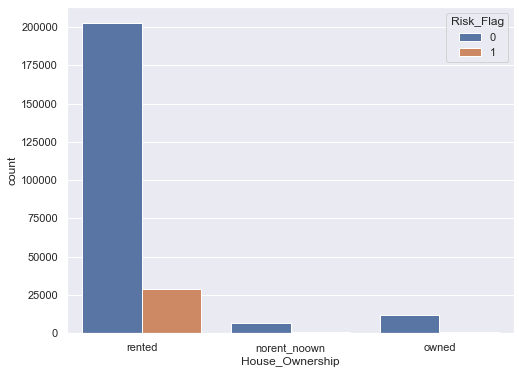

In [22]:
fig, ax = plt.subplots( figsize = (8, 6) )
sns.countplot(x='House_Ownership', hue='Risk_Flag', ax=ax, data=data)

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

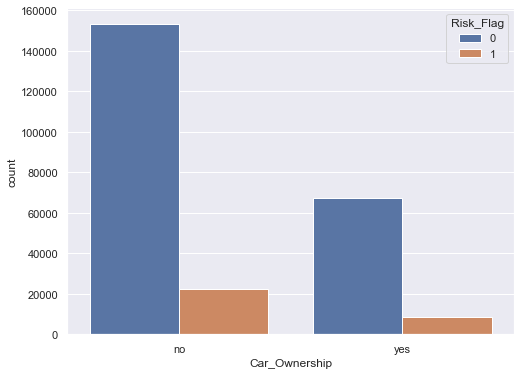

In [23]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=data)

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

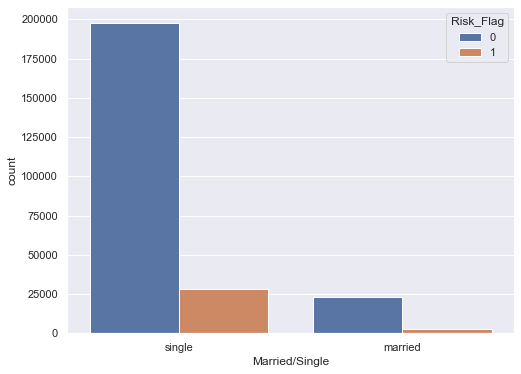

In [24]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='Married/Single', hue='Risk_Flag', data=data )

<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

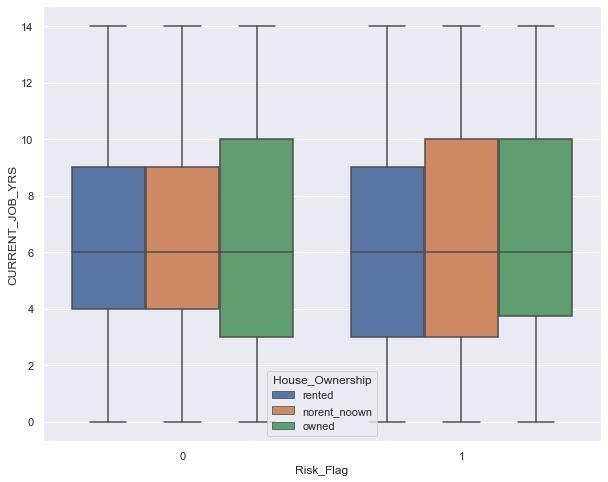

In [25]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = data)

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

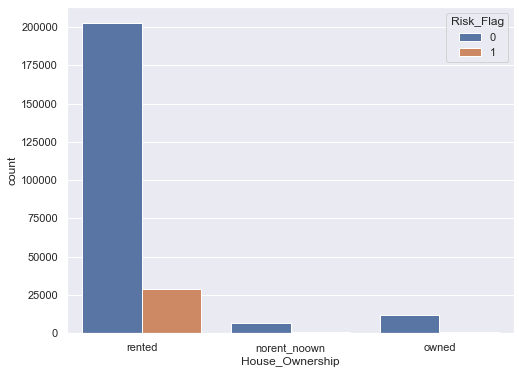

In [26]:
fig, ax = plt.subplots( figsize = (8, 6) )
sns.countplot(x='House_Ownership', hue='Risk_Flag', ax=ax, data=data)



<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

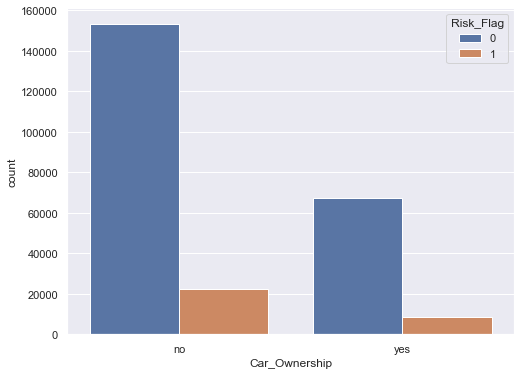

In [27]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=data)


<AxesSubplot:xlabel='Married/Single', ylabel='count'>

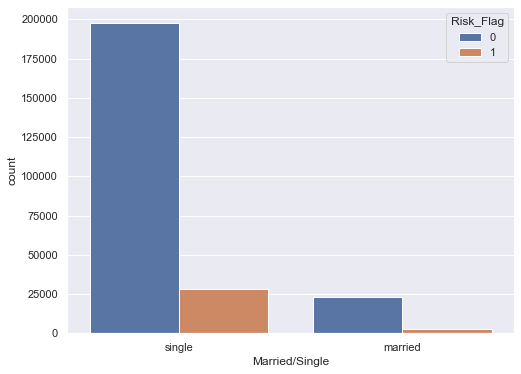

In [28]:

fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='Married/Single', hue='Risk_Flag', data=data )



<AxesSubplot:xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

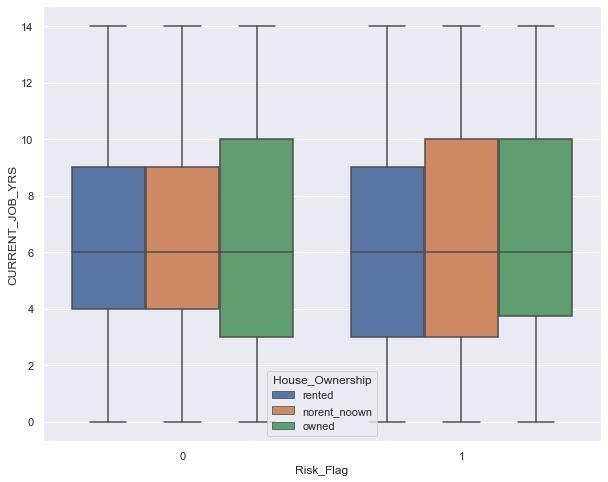

In [29]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = data)




In [30]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [31]:
label_encoder = LabelEncoder()

for col in ['Married/Single','Car_Ownership']:
    data[col] = label_encoder.fit_transform( data[col] )
onehot_encoder = OneHotEncoder(sparse = False)
data['House_Ownership'] = onehot_encoder.fit_transform(data['House_Ownership'].values.reshape(-1, 1) )
high_card_features = ['Profession', 'CITY', 'STATE']

count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform( data[high_card_features] )
data = data.join(count_encoded.add_suffix("_count"))
data.head()



,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_count,CITY_count,STATE_count
0,1,1303834,23,3,1,0.0,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,5217,798,14122
1,2,7574516,40,10,1,0.0,0,Software_Developer,Parbhani,Maharashtra,9,13,0,5053,849,25562
2,3,3991815,66,4,0,0.0,0,Technical_writer,Alappuzha,Kerala,4,10,0,5195,688,5805
3,4,6256451,41,2,1,0.0,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,5053,607,4658
4,5,5768871,47,11,1,0.0,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,4413,809,16537


In [32]:
data= data.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)
data.head()



,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_count,CITY_count,STATE_count
0,1,1303834,23,3,1,0.0,0,3,13,0,5217,798,14122
1,2,7574516,40,10,1,0.0,0,9,13,0,5053,849,25562
2,3,3991815,66,4,0,0.0,0,4,10,0,5195,688,5805
3,4,6256451,41,2,1,0.0,1,2,12,1,5053,607,4658
4,5,5768871,47,11,1,0.0,0,3,14,1,4413,809,16537


In [33]:
x = data.drop("Risk_Flag", axis=1)
y = data["Risk_Flag"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)

smote_sampler = SMOTE(random_state=9)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 53.799
Precision: 54.3071
F1-Score: 54.0519
Accuracy score: 88.75
AUC Score: 73.7254


In [35]:
from xgboost import XGBClassifier
Xgb=XGBClassifier()
ss = {
    "n_estimators" : [100,200,500],
    "max_depth" : [3,6,9],
    "gamma" : [0.01,0.1],
    "learning_rate" : [0.001,0.01,0.1,1]
}


In [36]:
Xgb.fit(x_train, y_train)

[20:29:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
Xgb_predict=Xgb.predict(x_test)

In [38]:
Xgb_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
accuracy_score(y_test,Xgb_predict)

0.9150396825396825

In [40]:
from sklearn.metrics import roc_auc_score

In [41]:
roc_auc_score(y_test,Xgb_predict)

0.6654397218467009

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,Xgb_predict,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     44201
           1       0.93      0.33      0.49      6199

    accuracy                           0.92     50400
   macro avg       0.92      0.67      0.72     50400
weighted avg       0.92      0.92      0.90     50400



In [44]:
#from sklearn.svm import SVC


In [45]:
#svc=SVC()
#svc.fit(x_train,y_train)


In [46]:

#svc_predict=svc.predict(x_test)

In [47]:
#accuracy_score(y_test,svc_predict)

In [48]:
#print(classification_report(y_test,svc_predict,labels=[0,1]))
#print(roc_auc_score(y_test,svc_predict))